# Implementation of ADAM

This method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients; the name Adam is derived from adaptive moment estimation. The method is designed to combine the advantages of two recently popular methods: AdaGrad (Duchi et al., 2011), which works well with sparse gradients, and RMSProp (Tieleman & Hinton, 2012), which works well in on-line and non-stationary
settings. Some of Adam’s advantages are that the magnitudes of parameter updates are invariant to rescaling of the gradient, its stepsizes are approximately bounded by the stepsize hyperparameter, it does not require a stationary objective, it works with sparse gradients, and it naturally performs a form of step size annealing. [arXiv:1412.6980]

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

As a simple example, let us find a local minimum for the function $f(x) = x^3-2x^2+2$

In [2]:
f = lambda x: x**3-2*x**2+2

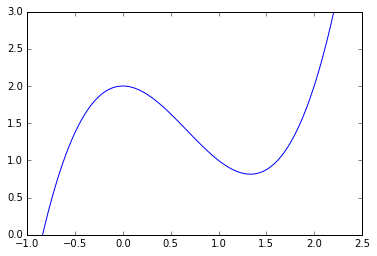

In [3]:
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

We can see from plot above that our local minimum is gonna be near around 1.4 or 1.5 (on the x-axis), but let's pretend that we don't know that, so we set our starting point (arbitrarily, in this case) at $x_0 = 2$

In [4]:
# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x

Reference for algorithm: https://arxiv.org/pdf/1412.6980.pdf

Algorithm 1: Adam, our proposed algorithm for stochastic optimization. 

Good default settings for the tested machine learning problems are $\alpha = 0.001$,
$\beta_1 = 0.9$, $\beta_2 = 0.999$ and $\epsilon = 10^{-8}$


In [5]:
# to avoid division by zero, we choose epsilon as   .
epsilon = 10**-8
# learning rate
alpha = 0.1
# exponential decay rates
b1 = 0.9
b2 = 0.999

In [6]:
# set precision
precision = 0.0001
# make lists for plotting ADAM
new_x = 2 # The algorithm starts at x=2
x_list, y_list = [np.array([new_x])], [f(new_x)]

In [7]:
x = new_x

#initalize m, v, t to zero
m = 0
v = 0
t = 0
# initialize sentinel to False
converged = False
# while the optimization algorithm has not yet converged
while (not converged):
    # time step increment by 1
    t = t + 1
    # determine the value of gradient
    g = f_prime(x)
    # calculate m 
    m = b1*m + ((1 - b1)*g)
    # calculate v 
    v = b2*v + ((1 - b2)*(g**2))
    # calculate m_hat
    m_hat = m/(1 - b1**t)
    # calculate v_hat
    v_hat = v/(1 - b2**t)
    # determine new_x
    new_x = x - (alpha*m_hat/((v_hat**(1/2)) + epsilon))
    # calculte convergence measure
    if abs(new_x - x) <= precision:
        converged = True
    # set x to the new_x
    x = new_x
    x_list.append(new_x)
    y_list.append(f(new_x))

In [9]:
print "Local minimum occurs at x =", new_x, "with f(x) =", f(new_x)
print "Number of steps:", len(x_list)

Local minimum occurs at x = 1.33789407709 with f(x) = 0.814856510447
Number of steps: 85


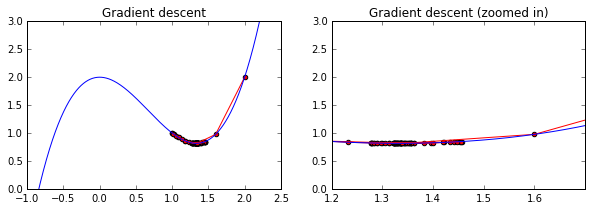

In [10]:
# visualize the gradient descent
plt.figure(figsize=[10,3])
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,1.7])
plt.ylim([0,3])
plt.title("Gradient descent (zoomed in)")
plt.show()